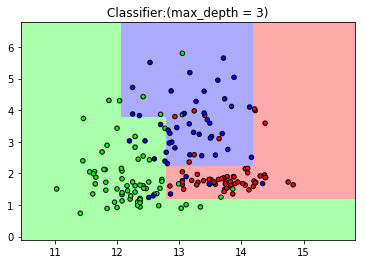

In [8]:
'''
决策树
'''

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import tree, datasets
from sklearn.model_selection import train_test_split

wine = datasets.load_wine();
X = wine.data[:, :2]
y = wine.target

X_train, X_test, y_train, y_test = train_test_split(X, y)
depth = 3
clf = tree.DecisionTreeClassifier(max_depth=depth)
clf.fit(X_train, y_train)

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(X[:,0], X[:,1], c=y, cmap=cmap_bold, edgecolors='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Classifier:(max_depth = %d)" % depth)

plt.show()

In [25]:
'''
演示决策树的工作过程 并不是必须的
'''
import graphviz
from sklearn.tree import export_graphviz

export_graphviz(clf, 
                out_file="wine.dot", 
                class_names=wine.target_names, 
                feature_names=wine.feature_names[:2], 
                impurity=False, 
                filled=True)

dot_graph = ""
with open("wine.dot") as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

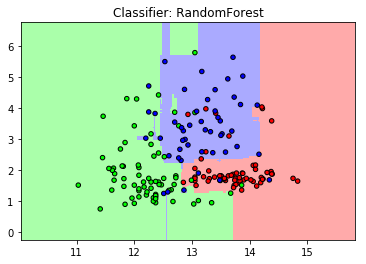

In [55]:
'''
随机森林
'''

from sklearn.ensemble import RandomForestClassifier
wine = datasets.load_wine();
X = wine.data[:, :2]
y = wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y)
forest = RandomForestClassifier(max_depth=5, n_estimators=100, random_state=500)
forest.fit(X_train, y_train)

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))
Z = forest.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(X[:,0], X[:,1], c=y, cmap=cmap_bold, edgecolors='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Classifier: RandomForest")

plt.show()

In [79]:
'''
成年人数据集
下载地址  https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
adult.data文件可以改为adult.csv后缀
'''

import pandas as pd
data = pd.read_csv('adult.csv', header=None, index_col=False,
                  names=['年龄', '单位性质', '权重', '学历', '受教育时长',
                         '婚姻状况', '职业', '家庭情况', '种族', '性别',
                         '资产所得', '资产损失', '周工作时长', '原籍', '收入'])

data_lite = data[['年龄', '单位性质', '学历', '性别', '周工作时长', '职业', '收入']]
display(data_lite.head())

data_dummies = pd.get_dummies(data_lite)

print("样本原始特征", list(data_lite.columns), "\n")
print("虚拟变量特征", list(data_dummies.columns), "\n")
display(data_dummies.head())


features = data_dummies.loc[:, '年龄':'职业_ Transport-moving']
X = features.values
y = data_dummies['收入_ >50K'].values

print("特征形态：{}  标签形态：{}".format(X.shape, y.shape))

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 使用决策树
go_dating_tree = tree.DecisionTreeClassifier(max_depth=5)
go_dating_tree.fit(X_train, y_train)
print("决策树模型得分： {:.2f}".format(go_dating_tree.score(X_test, y_test)))

# 随机森林
go_dating_forest = RandomForestClassifier(max_depth=5, n_estimators=100, random_state=8)
go_dating_forest.fit(X_train, y_train)
print("随机森林模型得分： {:.2f}".format(go_dating_forest.score(X_test, y_test)))

Mr_Z = [[37, 40, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,]]

print("\n决策树的判断")
dating_dec = go_dating_tree.predict(Mr_Z)
if dating_dec == 1:
    print("去追求")
else:
    print("不用了")

    
print("\n随机森林的判断")
dating_dec = go_dating_forest.predict(Mr_Z)
if dating_dec == 1:
    print("去追求")
else:
    print("不用了")


,年龄,单位性质,学历,性别,周工作时长,职业,收入
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


样本原始特征 ['年龄', '单位性质', '学历', '性别', '周工作时长', '职业', '收入'] 

虚拟变量特征 ['年龄', '周工作时长', '单位性质_ ?', '单位性质_ Federal-gov', '单位性质_ Local-gov', '单位性质_ Never-worked', '单位性质_ Private', '单位性质_ Self-emp-inc', '单位性质_ Self-emp-not-inc', '单位性质_ State-gov', '单位性质_ Without-pay', '学历_ 10th', '学历_ 11th', '学历_ 12th', '学历_ 1st-4th', '学历_ 5th-6th', '学历_ 7th-8th', '学历_ 9th', '学历_ Assoc-acdm', '学历_ Assoc-voc', '学历_ Bachelors', '学历_ Doctorate', '学历_ HS-grad', '学历_ Masters', '学历_ Preschool', '学历_ Prof-school', '学历_ Some-college', '性别_ Female', '性别_ Male', '职业_ ?', '职业_ Adm-clerical', '职业_ Armed-Forces', '职业_ Craft-repair', '职业_ Exec-managerial', '职业_ Farming-fishing', '职业_ Handlers-cleaners', '职业_ Machine-op-inspct', '职业_ Other-service', '职业_ Priv-house-serv', '职业_ Prof-specialty', '职业_ Protective-serv', '职业_ Sales', '职业_ Tech-support', '职业_ Transport-moving', '收入_ <=50K', '收入_ >50K'] 



,年龄,周工作时长,单位性质_ ?,单位性质_ Federal-gov,单位性质_ Local-gov,单位性质_ Never-worked,单位性质_ Private,单位性质_ Self-emp-inc,单位性质_ Self-emp-not-inc,单位性质_ State-gov,...,职业_ Machine-op-inspct,职业_ Other-service,职业_ Priv-house-serv,职业_ Prof-specialty,职业_ Protective-serv,职业_ Sales,职业_ Tech-support,职业_ Transport-moving,收入_ <=50K,收入_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


特征形态：(32561, 44)  标签形态：(32561,)
决策树模型得分： 0.80
随机森林模型得分： 0.79

决策树的判断
不用了

随机森林的判断
不用了
